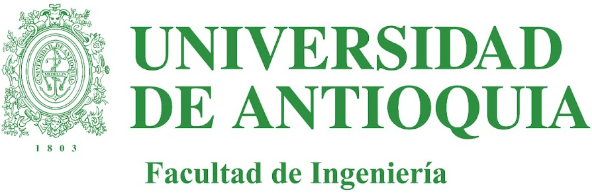

# **Modelos de Variable Latente para el Reconocimiento de Emociones**
## Docente: Hernán Felipe García Arias
## Por: David Alexander Sánchez, Juan Pablo Areiza
### Universidad de Antioquia, Medellín 2023

## Librerías

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

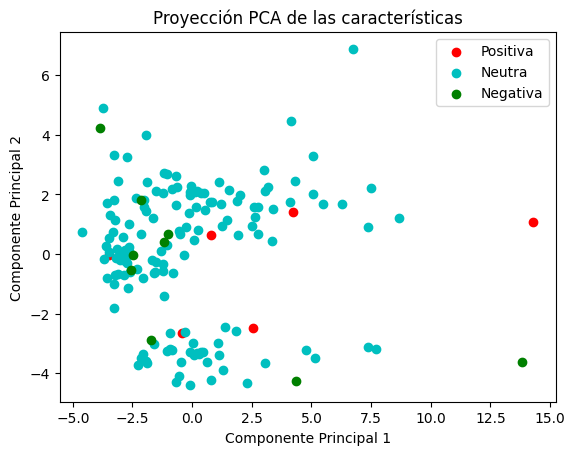

In [6]:
df = pd.read_csv('features.csv')

# Características y las etiquetas emocionales
X = df.iloc[:, 2:]  # Ignorar la primera columna y las etiquetas
y = df['Emociones']

# Codificación de las etiquetas emocionales en números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Se normalizan las características
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Análisis de Componentes Principales (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# DataFrame para los componentes principales
df_pca = pd.DataFrame(data=X_pca, columns=['Componente_1', 'Componente_2'])

# Gráfico de dispersión con colores para cada estado emocional
colors = ['r', 'c', 'g']  # Rojo para negativa, cian para neutra, verde para positiva

for i, emotion in enumerate(df['Emociones'].unique()):
    subset = df_pca[y_encoded == i]
    plt.scatter(subset['Componente_1'], subset['Componente_2'], label=emotion, color=colors[i])

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.title('Proyección PCA de las características')
plt.show()